In [4]:
# -*- coding: utf-8 -*-
"""
Created on Wed Mar 31 09:40:51 2021

@author: User
"""

import pandas as pd

df = pd.read_csv('2015_Street_Tree_Census_-_Tree_Data.csv')


import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px
import pandas as pd

df['tree_id_count']=1

df_total_tree_cnt=df.groupby(['borocode', 'spc_common'])['tree_id_count'].sum()
df_total_tree_cnt = df_total_tree_cnt.reset_index(drop=False)
df_total_tree_cnt.columns = ['borocode', 'spc_common', 'total_per_species']

df_tree_cnt_health = df.groupby(['borocode', 'spc_common','health'])['tree_id_count'].sum()
df_tree_cnt_health = df_tree_cnt_health.reset_index(drop=False)
df_tree_cnt_health.columns = ['borocode', 'spc_common', 'health', 'total']

tree_output = pd.merge(df_tree_cnt_health, df_total_tree_cnt, on=['borocode', 'spc_common'])

tree_output['proportion']=tree_output['total']/tree_output['total_per_species']


external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = dash.Dash(__name__, external_stylesheets=external_stylesheets)
colors = {
    'background': '#111111',
    'text': '#7FDBFF'
}

fig = px.bar(tree_output, x="health", y="proportion", barmode="group")
fig.update_layout(
    plot_bgcolor=colors['background'],
    paper_bgcolor=colors['background'],
    font_color=colors['text']
)

app.layout = html.Div(children=[
    html.H1(children='Proportion of Trees based on Health'),

    html.Div(children='''
        
    '''),

    dcc.Graph(
        id='example-graph',
        figure=fig
    )
])

#if __name__ == '__main__':
#    app.run_server(debug=True)

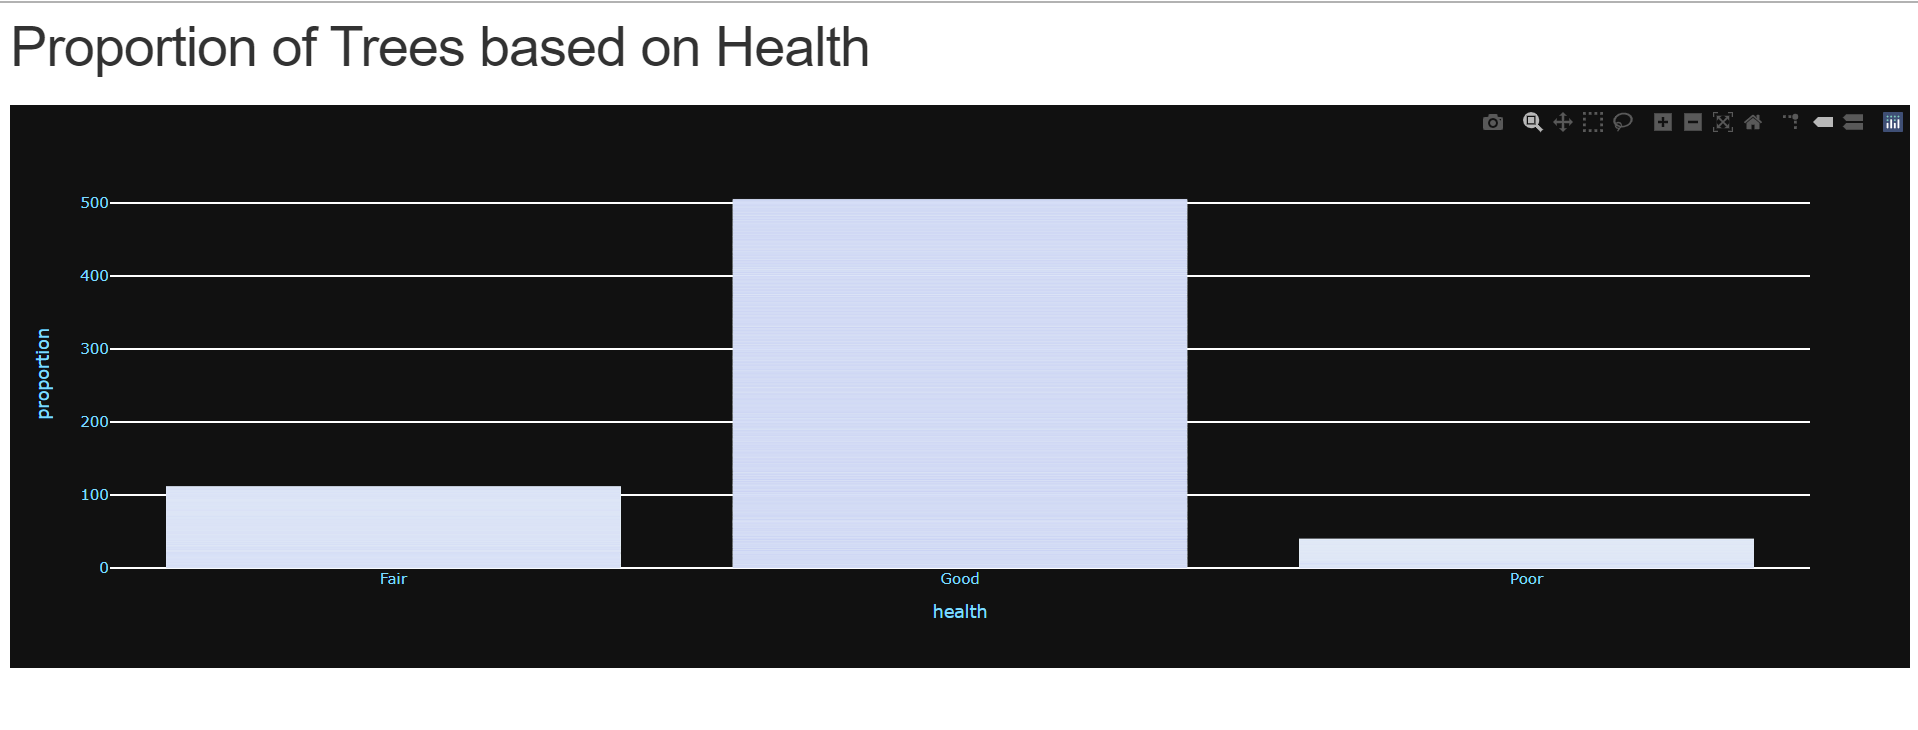

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Wed Mar 31 16:16:02 2021

@author: User
"""

import pandas as pd

import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px
import pandas as pd
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from plotly import tools

df = pd.read_csv('2015_Street_Tree_Census_-_Tree_Data.csv')

df_cols_select = df[['spc_common','status','borocode']]
df_cols_select = pd.DataFrame(df_cols_select.groupby(['borocode','spc_common']).sum())
boroughs = list(set(df['borocode']))
trace_list_q2 =[]

borough_list = list(map(lambda x: str(x), boroughs))
df_cols_select_steward = df[['spc_common','health','borocode','steward']]

df_cols_select_steward[['steward','health']] = df_cols_select_steward[['steward','health']].apply(lambda x : pd.factorize(x)[0])
corr_output = pd.DataFrame(df_cols_select_steward.groupby(['borocode','spc_common']).corr())
plot_figure = tools.make_subplots(rows=1, cols=len(boroughs), subplot_titles=tuple(borough_list))

boroughs = list(set(df_cols_select_steward['borocode']))
species = list(set(df_cols_select_steward['spc_common']))

for borough in boroughs:
    trace = go.Bar(
            x = list(df_cols_select.loc[borough].index),
            y = list(corr_output.loc[borough]['steward'][::2])
            )
    trace_list_q2 += [trace]

for i in range(len(boroughs)):
    plot_figure.append_trace(trace_list_q2[i], 1, i+1) 
        
plot_figure['layout'].update(showlegend=False,height=500, width=1400, title='Proportion of Trees based on health')


app = dash.Dash()

colors = {
    'background': '#ffffff',
    'text': '#111111'
}



app.layout = html.Div(style={'backgroundColor': colors['background']}, children=[
    html.H1(
        children='Question #2',
        style={
            'textAlign': 'center',
            'color': colors['text']
        }
    ),
    html.Div(children='Correlation Plot between steward and health ', style={
        'textAlign': 'center',
        'color': colors['text']
    }),
    
    html.Div([
        dcc.Graph(figure=plot_figure, id='my-figure')
])
    ])


#if __name__ == '__main__':
#    app.run_server(debug=True)

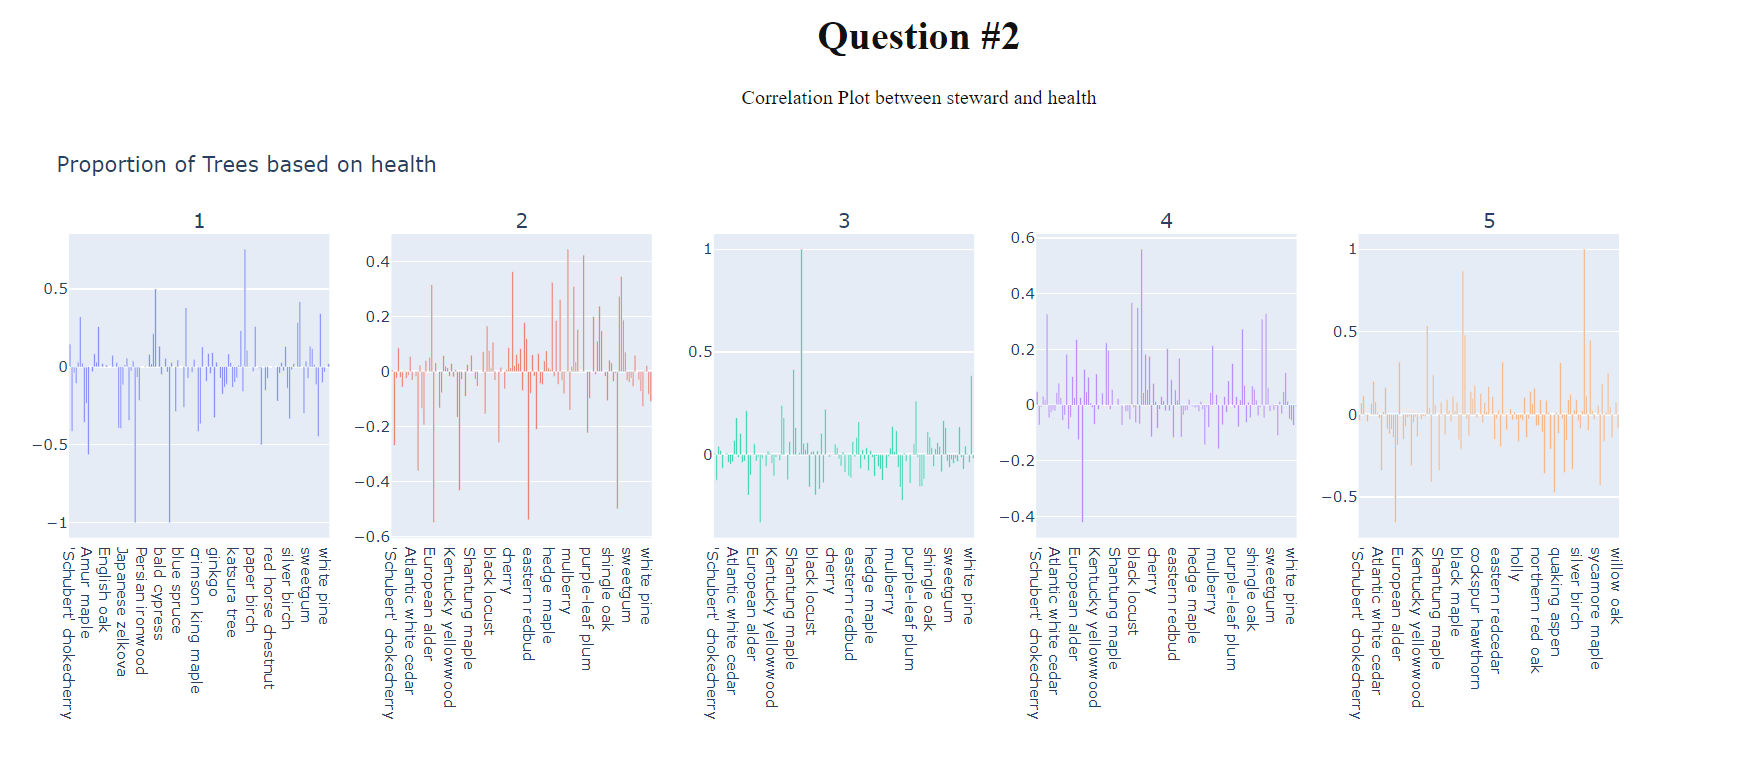